In [225]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, FunctionTransformer, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

from models.prepareData import getData, convertData
from models.models import linearRegressionModel, RANSACRegressionModel, PolynomialFeatures, polynomialRegression

In [226]:
# data = getData('Bán căn hộ chung cư', 'Nguyễn Hữu Thọ', 'Phước Kiển', 'Nhà Bè')
data = getData('Bán căn hộ chung cư', 'Nguyễn Hữu Cảnh', '22', 'Bình Thạnh')
# data = getData('Bán đất', 'Trần Văn Giàu', 'Lê Minh Xuân', 'Bình Chánh')
# data = getData('Bán đất', 'Vườn Lài', 'An Phú Đông', '12')
# data = getData('Bán nhà riêng', 'Quốc Lộ 13', 'Hiệp Bình Phước', 'Thủ Đức')
# data = getData('Bán nhà riêng', 'Phạm Văn Chiêu', '9', 'Gò Vấp')
# data = getData('Bán nhà riêng', 'Nguyễn Văn Quá', 'Đông Hưng Thuận', '12')
# data = getData('Bán nhà riêng', 'Quốc Lộ 13', 'Hiệp Bình Phước', 'Thủ Đức')
# data = getData('Bán đất', 'Nguyễn Thị Rành', 'Nhuận Đức', 'Củ Chi')

In [227]:
# preprocess data:

# sort data in post_date order to drop old data has same area:
data = data.sort_values(by=['posted_date'])

# Drop duplicates:    
data = data.drop_duplicates(subset='area', keep='last', inplace=False)

# sort data in area order:
data = data.sort_values(by=['area'])

In [228]:
# remove outlier:

# Area:
area_q1 = data['area'].quantile(0.25)
area_q3 = data['area'].quantile(0.75)
area_iqr = area_q3 - area_q1

# Minimum and maximum exclude outlier:
area_minimum = area_q1 - 1.5 * area_iqr
area_maximum = area_q3 + 1.5 * area_iqr

data = data[(data['area'] > area_minimum) & (data['area'] < area_maximum)]

# Price
price_q1 = data['price'].quantile(0.25)
price_q3 = data['price'].quantile(0.75)
price_iqr = price_q3 - price_q1

# Minimum and maximum exclude outlier:
price_minimum = price_q1 - 1.5 * price_iqr
price_maximum = price_q3 + 1.5 * price_iqr

data = data[(data['price'] > price_minimum) & (data['price'] < area_maximum)]

In [229]:
data = data[(data['area'] < 200) & (data['area'] > 0) & (data['price'] < 13)]

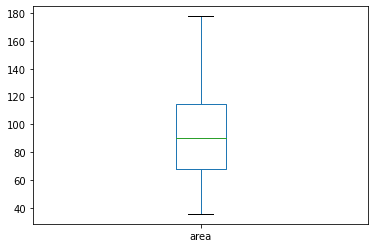

In [230]:
data['area'].plot(kind='box')
plt.show()

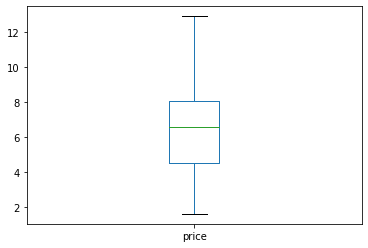

In [231]:
data['price'].plot(kind='box')
plt.show()

In [232]:
data

,post_type,area,price,street,ward,district,posted_date
680,Bán căn hộ chung cư,35.8,1.98,Nguyễn Hữu Cảnh,22,Bình Thạnh,2021-04-28
735,Bán căn hộ chung cư,36.0,2.80,Nguyễn Hữu Cảnh,22,Bình Thạnh,2021-04-28
78,Bán căn hộ chung cư,38.0,1.70,Nguyễn Hữu Cảnh,22,Bình Thạnh,2021-05-23
755,Bán căn hộ chung cư,40.3,2.60,Nguyễn Hữu Cảnh,22,Bình Thạnh,2021-04-28
746,Bán căn hộ chung cư,40.7,3.30,Nguyễn Hữu Cảnh,22,Bình Thạnh,2021-04-28
...,...,...,...,...,...,...,...
794,Bán căn hộ chung cư,158.0,12.00,Nguyễn Hữu Cảnh,22,Bình Thạnh,2021-05-05
10,Bán căn hộ chung cư,164.0,8.00,Nguyễn Hữu Cảnh,22,Bình Thạnh,2021-05-16
512,Bán căn hộ chung cư,165.0,6.50,Nguyễn Hữu Cảnh,22,Bình Thạnh,2021-04-03
838,Bán căn hộ chung cư,170.0,11.36,Nguyễn Hữu Cảnh,22,Bình Thạnh,2021-05-12


In [233]:
# np.array(data['area'])

In [234]:
# np.array(data['price'])

In [235]:
# smooth data:
# kernel_size = 10
# kernel = np.ones(kernel_size) / kernel_size

# data['price'] = np.convolve(np.array(data['price']), kernel, mode='same')
# data['price'] = data['price'].rolling(window=2).mean()
# data = data.dropna()

In [236]:
# np.array(data['area'])

In [237]:
# np.array(data['price'])

In [238]:
# divide data into train and test:
train_data, test_data = train_test_split(data, test_size=0.2)
train_data, validate_data = train_test_split(train_data, test_size=0.2)

In [239]:
# Sort data by area column:
train_data = train_data.sort_values(by=['area'])
test_data = test_data.sort_values(by=['area'])
validate_data = validate_data.sort_values(by=['area'])

print("\nTrain data length: ", len(train_data))
print("Test data length: ", len(test_data))
print("Validate data length: ", len(validate_data))


Train data length:  98
Test data length:  31
Validate data length:  25


In [240]:
# # # sort data by area to perform smoothing data:
# # train_data = train_data.sort_values(by=['area'])
# # # smooth data:
# # kernel_size = 2
# # kernel = np.ones(kernel_size) / kernel_size

# # # train_data['area'] = np.convolve(np.array(train_data['area']), kernel, mode='same')
# # train_data['price'] = np.convolve(np.array(train_data['price']), kernel, mode='same')
# train_data['price'] = train_data['price'].rolling(window=5, center=True).mean()

# # drop null values:
# train_data = train_data.dropna()

In [241]:
# # # sort data by area to perform smoothing data:
# # test_data = test_data.sort_values(by=['area'])

# # # smooth data:
# # kernel_size = 1
# # kernel = np.ones(kernel_size) / kernel_size

# # # test_data['area'] = np.convolve(np.array(test_data['area']), kernel, mode='same')
# # test_data['price'] = np.convolve(np.array(test_data['price']), kernel, mode='same')

# test_data['price'] = test_data['price'].rolling(window=5, center=True).mean()

# # drop null values:
# test_data = test_data.dropna()

In [242]:
# # # sort data by area to perform smoothing data:
# # validate_data = validate_data.sort_values(by=['area'])

# # # smooth data:
# # kernel_size = 1
# # kernel = np.ones(kernel_size) / kernel_size

# # # validate_data['area'] = np.convolve(np.array(validate_data['area']), kernel, mode='same')
# # validate_data['price'] = np.convolve(np.array(validate_data['price']), kernel, mode='same')

# validate_data['price'] = validate_data['price'].rolling(window=5, center=True).mean()

# # drop null values:
# validate_data = validate_data.dropna()

In [243]:
# # convert data into numpy
X, Y = convertData(data)
X_train, Y_train = convertData(train_data)
X_test, Y_test = convertData(test_data)
X_validate, Y_validate = convertData(validate_data)

In [244]:
# scale data:

# Standard Scaler:

# X = StandardScaler().fit_transform(X)
# Y = StandardScaler().fit_transform(Y)

# X_train = StandardScaler().fit_transform(X_train)
# Y_train = StandardScaler().fit_transform(Y_train)

# X_test = StandardScaler().fit_transform(X_test)
# Y_test = StandardScaler().fit_transform(Y_test)

# X_validate = StandardScaler().fit_transform(X_validate)
# Y_validate = StandardScaler().fit_transform(Y_validate)


# Quantile Transformer:

# X = QuantileTransformer(n_quantiles=len(X_train), output_distribution='uniform').fit_transform(X)
# Y = QuantileTransformer(n_quantiles=len(Y_train), output_distribution='uniform').fit_transform(Y)

# X_train = QuantileTransformer(n_quantiles=len(X_train), output_distribution='uniform').fit_transform(X_train)
# Y_train = QuantileTransformer(n_quantiles=len(Y_train), output_distribution='uniform').fit_transform(Y_train)

# X_test = QuantileTransformer(n_quantiles=len(X_test), output_distribution='uniform').fit_transform(X_test)
# Y_test = QuantileTransformer(n_quantiles=len(X_test), output_distribution='uniform').fit_transform(Y_test)

# X_validate = QuantileTransformer(n_quantiles=len(X_validate), output_distribution='uniform').fit_transform(X_validate)
# Y_validate = QuantileTransformer(n_quantiles=len(Y_validate), output_distribution='uniform').fit_transform(Y_validate)

# Power Transformer:

# X = PowerTransformer(method='yeo-johnson').fit_transform(X)
Y = PowerTransformer(method='yeo-johnson').fit_transform(Y)

# X_train = PowerTransformer(method='yeo-johnson').fit_transform(X_train)
Y_train = PowerTransformer(method='yeo-johnson').fit_transform(Y_train)

# X_test = PowerTransformer(method='yeo-johnson').fit_transform(X_test)
Y_test = PowerTransformer(method='yeo-johnson').fit_transform(Y_test)

# X_validate = PowerTransformer(method='yeo-johnson').fit_transform(X_validate)
Y_validate = PowerTransformer(method='yeo-johnson').fit_transform(Y_validate)

# Log Transformer:

# X = FunctionTransformer(np.log1p).fit_transform(X)
# Y = FunctionTransformer(np.log1p).fit_transform(Y)

# X_train = FunctionTransformer(np.log1p).fit_transform(X_train)
# Y_train = FunctionTransformer(np.log1p).fit_transform(Y_train)

# X_test = FunctionTransformer(np.log1p).fit_transform(X_test)
# Y_test = FunctionTransformer(np.log1p).fit_transform(Y_test)

# X_validate = FunctionTransformer(np.log1p).fit_transform(X_validate)
# Y_validate = FunctionTransformer(np.log1p).fit_transform(Y_validate)

Text(0.5, 1.0, 'Y_validate')

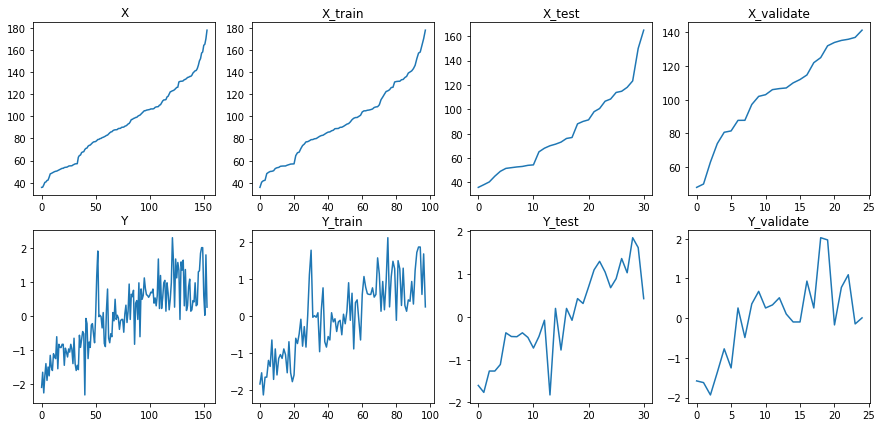

In [245]:
fig, ax = plt.subplots(2, 4, figsize=(15, 7))
ax[0][0].plot(X)
ax[0][0].set_title('X')
ax[0][1].plot(X_train)
ax[0][1].set_title('X_train')
ax[0][2].plot(X_test)
ax[0][2].set_title('X_test')
ax[0][3].plot(X_validate)
ax[0][3].set_title('X_validate')

ax[1][0].plot(Y)
ax[1][0].set_title('Y')
ax[1][1].plot(Y_train)
ax[1][1].set_title('Y_train')
ax[1][2].plot(Y_test)
ax[1][2].set_title('Y_test')
ax[1][3].plot(Y_validate)
ax[1][3].set_title('Y_validate')

In [246]:
# find model by using linear regression:
# linear_model = linearRegressionModel(X_train, Y_train)
linear_model = RANSACRegressionModel(X_train, Y_train)

# find Y by using linear model predict:
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)

# Calculate RMSE on train and test data:
train_linear_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
test_linear_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))


Linear Regression Model: 


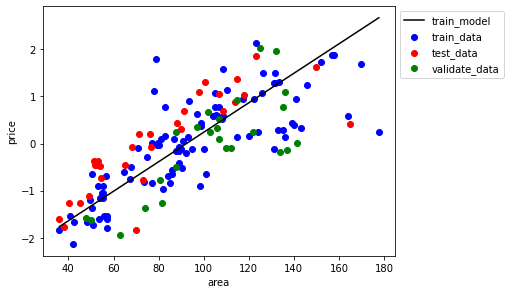

In [247]:
print("\nLinear Regression Model: ")
# Plot linear model:
plt.figure(figsize=(7, 4))
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.scatter(X_validate, Y_validate, marker='o', color='green', label='validate_data')
plt.plot(X_train, Y_train_pred, color='black', label='train_model')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [248]:
# Linear Model coefficient and intercept:
# print("Linear model coefficient: {}".format(linear_model.coef_))
# print("Linear model intercept: {}".format(linear_model.intercept_))

# linear_model rmse:
print("Linear model rmse on train data: {}".format(train_linear_rmse))
print("Linear model rmse on test data: {}".format(test_linear_rmse))
print("\n\n")

Linear model rmse on train data: 0.6566206765195931
Linear model rmse on test data: 0.7006569824356619





In [249]:
# find model by using polynomial regression:
poly_model, degree, train_rmse, validate_rmse, test_rmse = polynomialRegression(X, Y, X_train, Y_train, X_test, Y_test, X_validate, Y_validate)

# transform X and X_test:
polynomial_features = PolynomialFeatures(degree=degree)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

# Try predicting Y
Y_train_poly_pred = poly_model.predict(X_train_poly)
Y_test_poly_pred = poly_model.predict(X_test_poly)


Selected Polynomial Regression with degree = 14 and validate RMSE = 0.6614958610926066
Selected Regularized Regression with alpha = 1e-05 and validate RMSE = 0.6768700967007124
Polynomial Regression cross validation score:  -0.5494612532468895
Selected Regularized Regression cross validation score:  -0.5494611336037226


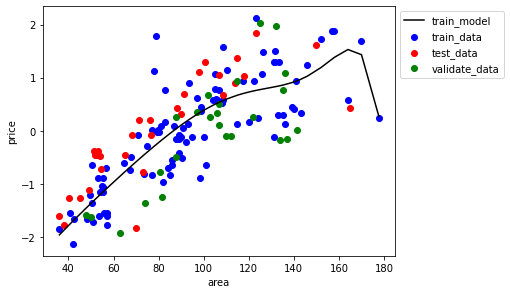

In [250]:
# Plot model:
plt.figure(figsize=(7, 4))
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.scatter(X_validate, Y_validate, marker='o', color='green', label='validate_data')
plt.plot(X_train, Y_train_poly_pred, color='black', label='train_model')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [251]:
print("Polynomial Regression with degree = {}\n".format(degree))
# Polynomial Model coefficient and intercept:
print("Polynomial model coefficient:")
print(poly_model.coef_)
print("Polynomial model intercept: {}\n".format(poly_model.intercept_))

# poly_model rmse:
print("Polynomial Model RMSE on train data: {}".format(train_rmse))
print("Polynomial Model RMSE on validate data: {}".format(validate_rmse))
print("Polynomial Model RMSE on test data: {}".format(test_rmse))

Polynomial Regression with degree = 14

Polynomial model coefficient:
[[ 0.00000000e+00  5.74170726e-02 -2.25437543e-04  3.50286986e-07
   8.01676200e-09  9.66140391e-12 -3.15477438e-13 -2.84872328e-15
  -1.10132235e-17  1.48200108e-20  5.56956519e-22  4.56809507e-24
   2.05456495e-26 -5.81354274e-30 -1.24044456e-30]]
Polynomial model intercept: [-3.7653375]

Polynomial Model RMSE on train data: 0.541578167211185
Polynomial Model RMSE on validate data: 0.6768700967007124
Polynomial Model RMSE on test data: 0.6414161143497655


In [252]:
# score the model with test data:

# Linear score:
print("\n")
print("Linear Model score on train dataset: ", linear_model.score(X_train, Y_train))
print("Linear Model score on test dataset: ", linear_model.score(X_test, Y_test))

# Poly score:
print("\n")
print("Poly Model score on train dataset: ", poly_model.score(X_train_poly, Y_train))
print("Poly Model score on test dataset: ", poly_model.score(X_test_poly, Y_test))



Linear Model score on train dataset:  0.5688492871669519
Linear Model score on test dataset:  0.5090797929641528


Poly Model score on train dataset:  0.7066930888001737
Poly Model score on test dataset:  0.5885853682524487
